In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



import os
print(os.listdir("../input"))





['creditcardfraud']


In [2]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


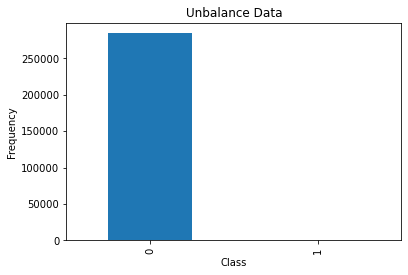

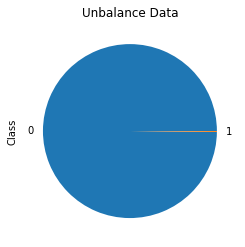

In [3]:


#unbalace of the data using bar graph
count = pd.value_counts(data['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
plt.title('Unbalance Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# unbalace of the data using pie chart
count = pd.value_counts(data['Class'], sort = True).sort_index()
count.plot(kind = 'pie')
plt.title('Unbalance Data')
plt.show()




In [4]:
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100

print("The number of normal transactions(Class 0) are: ", No_of_normals)
print("The number of fraudulent transactions(Class 1) are: ", No_of_frauds)
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

The number of normal transactions(Class 0) are:  284315
The number of fraudulent transactions(Class 1) are:  492
Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


In [5]:
#Resampleing the dataset
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
X=data.drop(['Time','Amount'],axis=1)
y=data['Class']

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

# show the dimensions of the train/test data
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (213605, 30)
X_test.shape:  (71202, 30)
y_train.shape:  (213605,)
y_test.shape:  (71202,)


In [6]:
normal_class = data[data.Class == 0]
fraud_class = data[data.Class == 1]
undersampled_data = pd.concat([normal_class.sample(frac = (len(fraud_class)/len(normal_class))), fraud_class.sample(frac=1)],axis=0)
X = pd.DataFrame(undersampled_data.iloc[:,undersampled_data.columns!='Class'])
y = undersampled_data.iloc[:,undersampled_data.columns == 'Class']


sc = StandardScaler()
X["scaled_Amount"]=  sc.fit_transform(X.iloc[:,29].values.reshape(-1,1))
X= X.drop(["Time","Amount"], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

classifier= SVC(C= 10, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, np.array(y_train).ravel())

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("The accuracy is "+str((cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1]+cm[1,0] + cm[1,1])*100) + " %")
print("The recall is "+ str(cm[1,1]/(cm[1,0] + cm[1,1])*100) +" %")
print("The precision is "+ str(cm[1,1]/(cm[0,1] + cm[1,1])*100) +" %")


The accuracy is 95.6923076923077 %
The recall is 93.86503067484662 %
The precision is 97.45222929936305 %


In [7]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion



,predicted fraud,predicted normal
is Fraud,153,10
is Normal,4,158


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       162
           1       0.97      0.94      0.96       163

    accuracy                           0.96       325
   macro avg       0.96      0.96      0.96       325
weighted avg       0.96      0.96      0.96       325



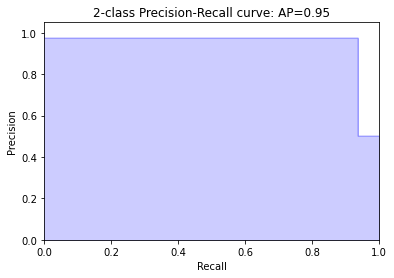

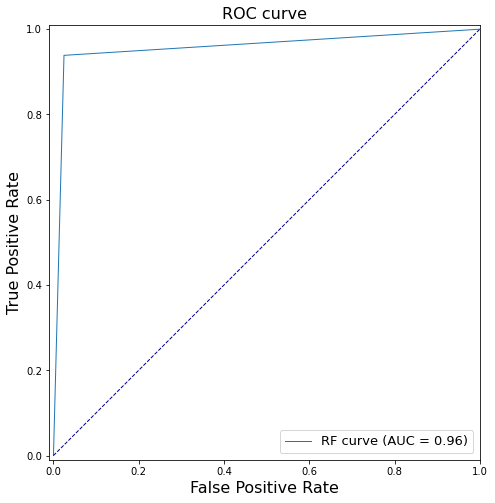

In [9]:
con_mat = confusion_matrix(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()